In [1]:
"""-------------------------------------PREVIOUS LAB---------------------------------"""

#1
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', None)

In [2]:
customer_df=pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
customer_df.columns=customer_df.columns.str.lower().str.replace(" ","_")
customer_df=customer_df.drop("customer",axis=1)

In [4]:
numerical_df = customer_df.select_dtypes("float","int")
categorical_df = customer_df.select_dtypes("object")

In [5]:
"""-------------------------------------PREVIOUSLAB---------------------------------"""

#1
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [6]:
#2
"""
for col in categorical_df:
    fig, ax = plt.subplots()
    categorical_df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_title(col)
    plt.show()
"""
print()

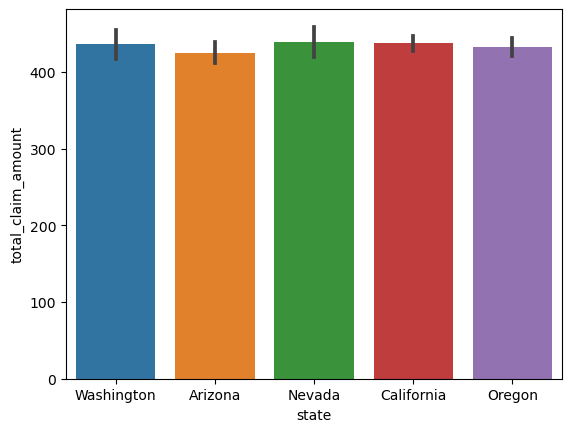

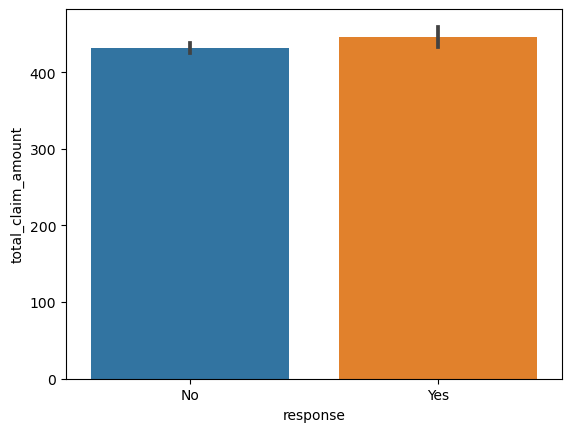

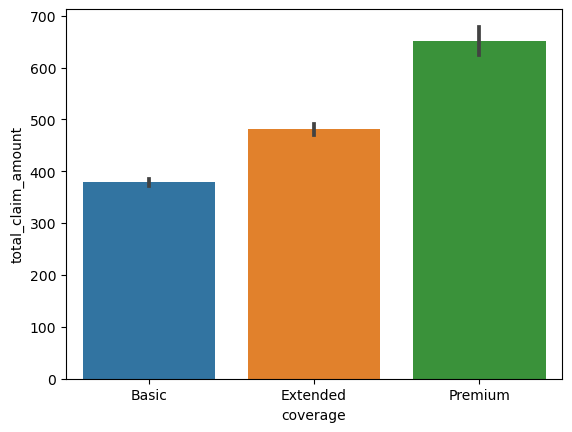

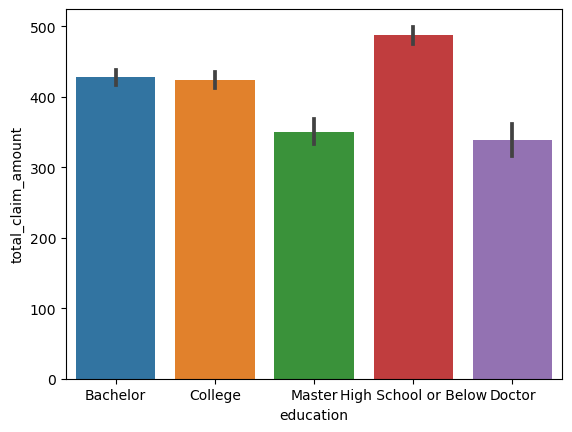

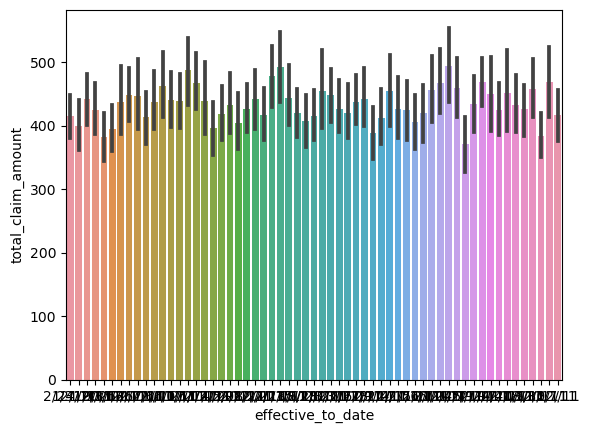

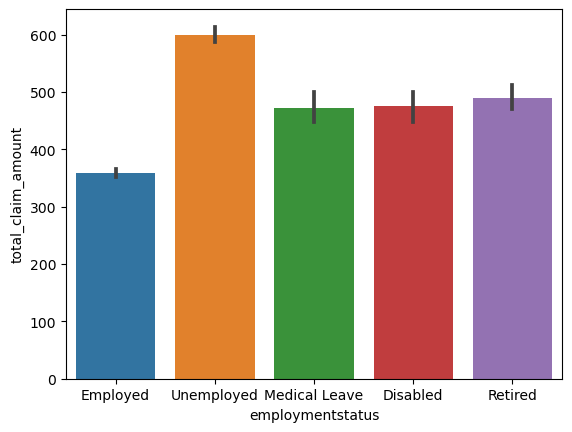

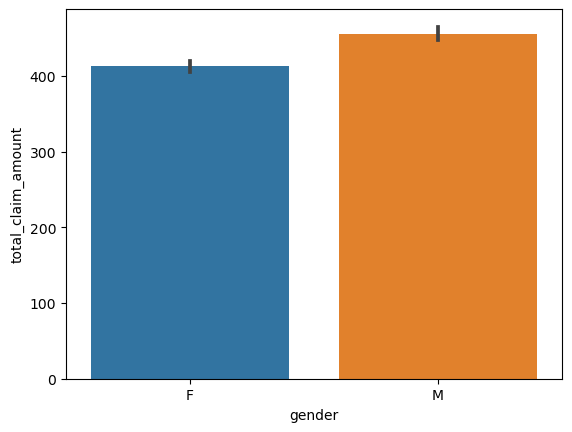

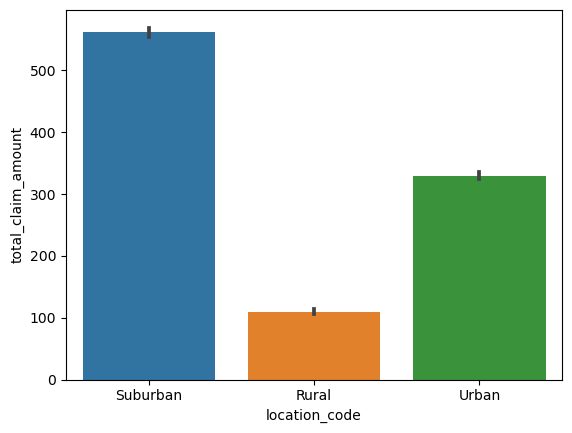

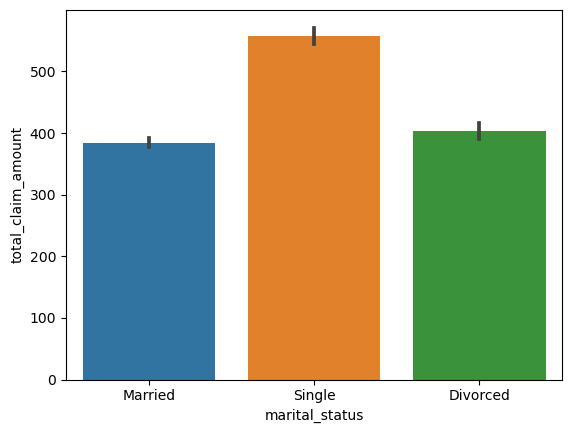

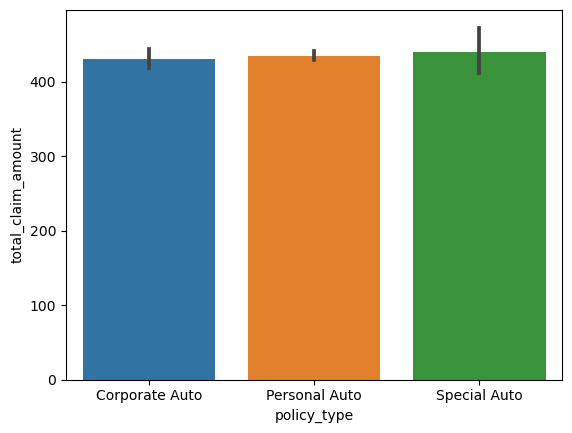

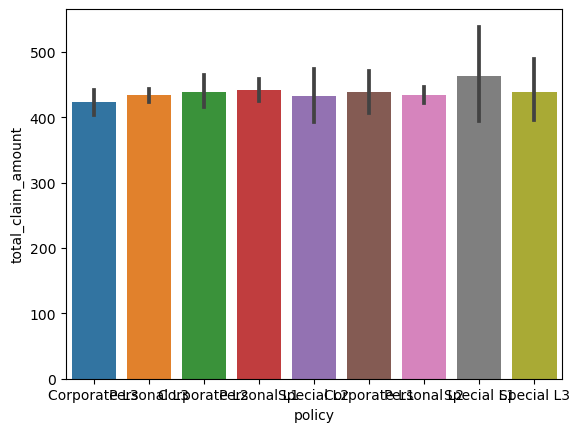

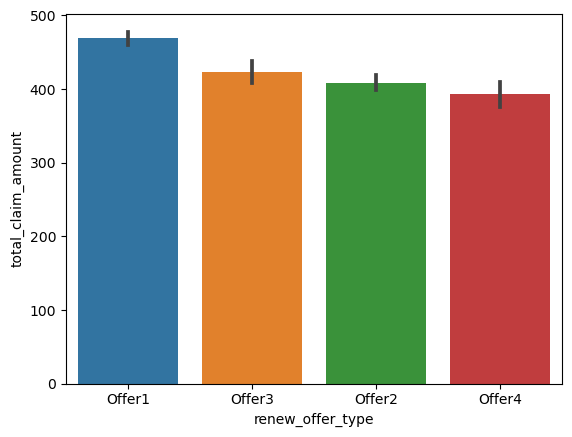

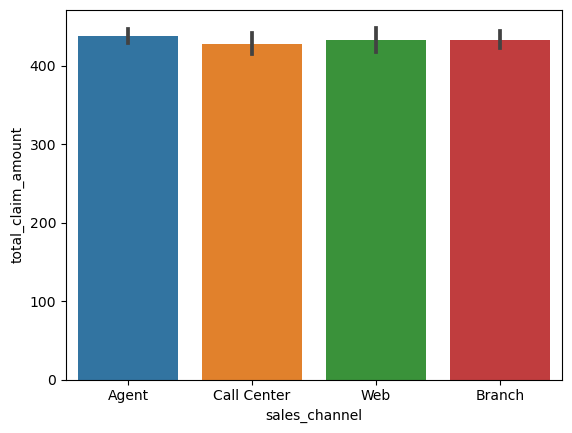

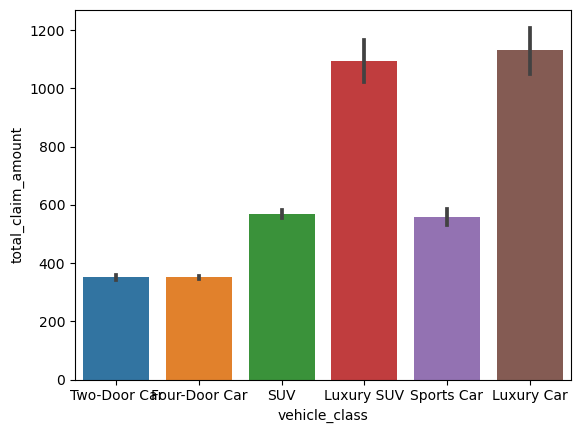

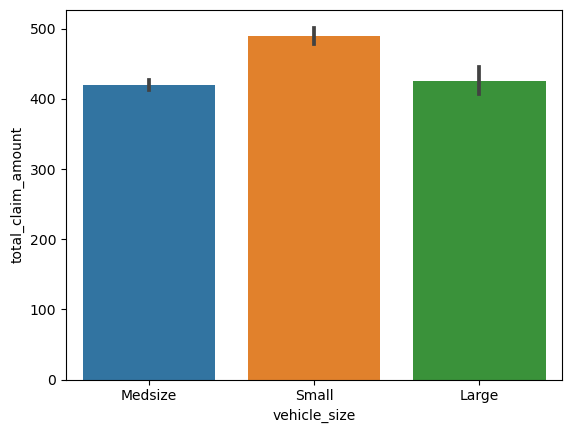

In [7]:
for col in categorical_df.columns:
    sns.barplot(x=col,y='total_claim_amount',data=customer_df)
    plt.show()

In [8]:
#3 I would drop many columns which are redundant compared 
#to my target (STATE,RESPONSE,EDUCATION,GENDER,POLICY TYPE,POLICY,SALES_CHANNEL)

In [9]:
#4
categorical_df['effective_to_date'] = pd.to_datetime(categorical_df['effective_to_date'])

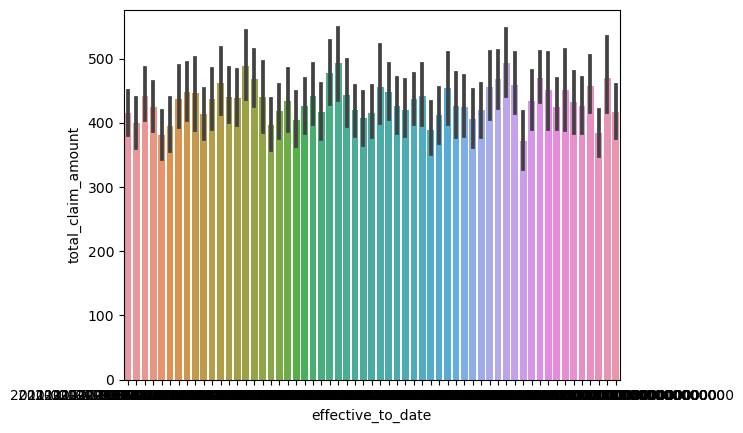

In [10]:
sns.barplot(categorical_df['effective_to_date'],y=customer_df['total_claim_amount'])
plt.show()

In [11]:
categorical_df['effective_to_date'] = categorical_df['effective_to_date'].astype(str)

In [12]:
categorical_df['effective_to_date']

0       2011-02-24
1       2011-01-31
2       2011-02-19
3       2011-01-20
4       2011-02-03
           ...    
9129    2011-02-10
9130    2011-02-12
9131    2011-02-06
9132    2011-02-03
9133    2011-02-14
Name: effective_to_date, Length: 9134, dtype: object

In [13]:
text= "2011-02-24"

In [14]:
text[5:7]

'02'

In [15]:
categorical_df["effective_to_date"].str[0:7]

0       2011-02
1       2011-01
2       2011-02
3       2011-01
4       2011-02
         ...   
9129    2011-02
9130    2011-02
9131    2011-02
9132    2011-02
9133    2011-02
Name: effective_to_date, Length: 9134, dtype: object

In [16]:
categorical_df["effective_to_date"]=categorical_df["effective_to_date"].str[0:7]

In [17]:
categorical_df

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


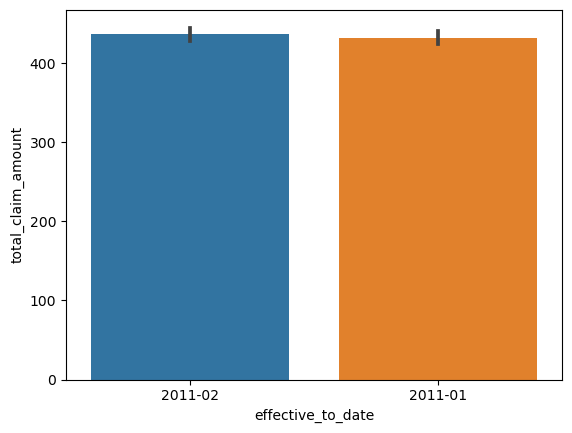

In [18]:
sns.barplot(categorical_df['effective_to_date'],y=customer_df['total_claim_amount'])
plt.show()

In [19]:
#only 2 months, only 2 years, there is not enough info. I would get rid of this column. 
#However, in a complete df, this could give me seasonality

In [1]:
"""-------------------------------------NEW LAB---------------------------------"""

'-------------------------------------NEW LAB---------------------------------'

In [21]:
#1
numerical_df

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
1,6979.535903,1131.464935
2,12887.431650,566.472247
3,7645.861827,529.881344
4,2813.692575,138.130879
...,...,...
9129,23405.987980,198.234764
9130,3096.511217,379.200000
9131,8163.890428,790.784983
9132,7524.442436,691.200000


In [22]:
categorical_df


,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,2011-02,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,2011-01,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2011-02,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,2011-01,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2011-02,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,2011-02,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,2011-02,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,2011-02,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,2011-02,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [23]:
data2=pd.concat([numerical_df,categorical_df], axis=1)
data2['effective_to_date'] = (data2['effective_to_date'].astype(str))
data2["effective_to_date"]=data2["effective_to_date"].str.replace("-","")
data2["effective_to_date"]=pd.to_numeric(data2["effective_to_date"])

In [24]:
data2.dtypes

customer_lifetime_value    float64
total_claim_amount         float64
state                       object
response                    object
coverage                    object
education                   object
effective_to_date            int64
employmentstatus            object
gender                      object
location_code               object
marital_status              object
policy_type                 object
policy                      object
renew_offer_type            object
sales_channel               object
vehicle_class               object
vehicle_size                object
dtype: object

In [25]:
numerical_df=data2.select_dtypes(np.number)
categorical_df=data2.select_dtypes("object")

In [26]:
target=numerical_df["total_claim_amount"]
numerical_df=numerical_df.drop("total_claim_amount",axis=1)

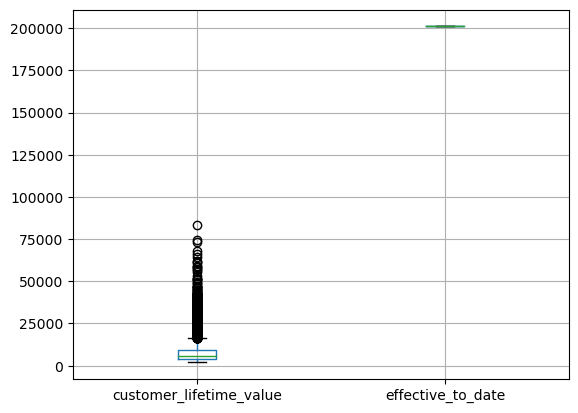

In [27]:
numerical_df.boxplot()
plt.show()

In [28]:
def clean_iqr(df, column):
    iqr = np.percentile(df[column], 75) - np.percentile(df[column], 25)
    upper_limit = np.percentile(df[column], 75) + 1.5 * iqr
    lower_limit = np.percentile(df[column], 25) - 1.5 * iqr
    new_df = df[(df[column] < upper_limit) & (df[column] > lower_limit)]
    return new_df

In [29]:
for x in numerical_df.columns:
    numerical_df = clean_iqr(numerical_df, x)

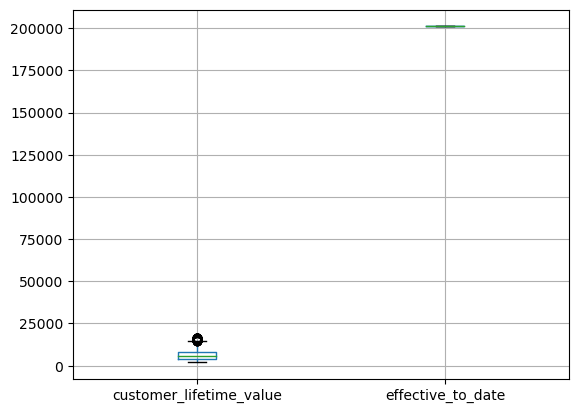

In [30]:
numerical_df.boxplot()
plt.show()

In [31]:
customer_concat=pd.concat([numerical_df,categorical_df,target], axis=1)

In [32]:
customer_concat=customer_concat.dropna()

In [33]:
print(customer_concat.isna().sum()/len(customer_concat))
print(customer_concat.shape)

customer_lifetime_value    0.0
effective_to_date          0.0
state                      0.0
response                   0.0
coverage                   0.0
education                  0.0
employmentstatus           0.0
gender                     0.0
location_code              0.0
marital_status             0.0
policy_type                0.0
policy                     0.0
renew_offer_type           0.0
sales_channel              0.0
vehicle_class              0.0
vehicle_size               0.0
total_claim_amount         0.0
dtype: float64
(8317, 17)


In [34]:
#2
numericals=customer_concat.select_dtypes(np.number)
numericals=numericals.drop(["total_claim_amount"],axis=1)
categoricals=customer_concat.select_dtypes("object")

In [36]:
#3
scaler = StandardScaler()
numericals = pd.DataFrame(scaler.fit_transform(numericals), columns=numericals.columns)

In [37]:
#4

print(categoricals.columns)
categoricals=categoricals.drop(["response","education","gender"],axis=1)
categoricals


Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')


,state,coverage,employmentstatus,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,Basic,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,Extended,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,Premium,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,Basic,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,Basic,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...
9128,California,Premium,Employed,Suburban,Single,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Large
9130,California,Extended,Employed,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,Extended,Unemployed,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,Extended,Employed,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [38]:
one_hot=categoricals[["state","marital_status","policy_type","policy","renew_offer_type","sales_channel","vehicle_class"]]
ordinal=categoricals[["coverage","employmentstatus","location_code","vehicle_class"]]

In [39]:
ordinal_encoded=OrdinalEncoder().fit_transform(ordinal)
ordinal=pd.DataFrame(ordinal_encoded,columns=ordinal.columns)
ordinal

,coverage,employmentstatus,location_code,vehicle_class
0,0.0,1.0,1.0,5.0
1,1.0,4.0,1.0,0.0
2,2.0,1.0,1.0,5.0
3,0.0,4.0,1.0,3.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
8312,2.0,1.0,1.0,0.0
8313,1.0,1.0,1.0,0.0
8314,1.0,4.0,1.0,0.0
8315,1.0,1.0,1.0,0.0


In [40]:
onehot_encoder = OneHotEncoder(drop='first')
onehot_encoded = onehot_encoder.fit_transform(one_hot)
onehot_encoded_df = pd.DataFrame.sparse.from_spmatrix(onehot_encoded)
feature_names = onehot_encoder.get_feature_names(one_hot.columns)
onehot_encoded_df.columns = feature_names
one_hot = pd.concat([one_hot, onehot_encoded_df], axis=1)
one_hot.drop(columns=one_hot.select_dtypes(include=['object']).columns, inplace=True)

In [42]:
one_hot.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
ordinal.head()

,coverage,employmentstatus,location_code,vehicle_class
0,0.0,1.0,1.0,5.0
1,1.0,4.0,1.0,0.0
2,2.0,1.0,1.0,5.0
3,0.0,4.0,1.0,3.0
4,0.0,1.0,0.0,0.0


In [44]:
numericals.head()

,customer_lifetime_value,effective_to_date
0,-1.085002,1.074033
1,0.216144,-0.931070
2,2.039439,1.074033
3,0.421786,-0.931070
4,-1.069518,1.074033


In [ ]:
#5 DONE in #1

In [55]:
#6
data_done = pd.concat([numericals, ordinal, one_hot, target], axis=1)
data_done=data_done.dropna()
data_done

,customer_lifetime_value,effective_to_date,coverage,employmentstatus,location_code,vehicle_class,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,total_claim_amount
0,-1.085002,1.074033,0.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,384.811147
1,0.216144,-0.931070,1.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1131.464935
2,2.039439,1.074033,2.0,1.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,566.472247
3,0.421786,-0.931070,0.0,4.0,1.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,529.881344
4,-1.069518,1.074033,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8312,-0.672415,-0.931070,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.759970
8313,-0.982234,1.074033,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,307.200000
8314,0.581660,1.074033,1.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,350.400000
8315,0.384313,1.074033,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,333.696228
